In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [7,7]
import time
from IPython.display import clear_output
from ipywidgets import widgets
from IPython.display import display
import random
from ipywidgets import HBox, Label
from IPython.display import HTML

/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def hide_code():
    return HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $("div.input").hide();
     } else {
     $("div.input").show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
hide_code()

In [4]:
max_shapes_dropdown = widgets.Dropdown(options=list(range(1,16)),value=10)
min_shapes_dropdown = widgets.Dropdown(options=list(range(1,16)),value=1)
n_seconds_dropdown = widgets.Dropdown(options=list(range(1,3)),value=1)
display(HBox([Label('Max Number of Shapes in Game:'),max_shapes_dropdown]))
display(HBox([Label('Min Number of Shapes in Game:'),min_shapes_dropdown]))
display(HBox([Label('Number of Seconds:'),n_seconds_dropdown]))

In [5]:
def game2():
    max_n_shapes = max_shapes_dropdown.value
    min_n_shapes = min_shapes_dropdown.value
    n_seconds = n_seconds_dropdown.value
    list_of_shapes = ['o','^','<','>','s']
    list_of_colors = ['b', 'g', 'r']
    set_of_points = [(x,y) for x in range(2,8) for y in range(2,8)]
    
    n_shapes = random.randint(min_n_shapes,max_n_shapes+1)
    
    shape = random.choice(list_of_shapes)
    color = random.choice(list_of_colors)
    
    indices = random.sample(range(len(set_of_points)), n_shapes)
    points = [set_of_points[i] for i in indices]
    
    x_vals = [point[0] for point in points]
    y_vals = [point[1] for point in points]
    
    return x_vals, y_vals, color, shape

In [6]:
def on_button_clicked(b):    
    global x_vals, y_vals, color, shape
    x_vals, y_vals, color, shape= game2()
    
    
    plt.xlim([0,10])
    plt.ylim([0,10])    
    plt.scatter(x_vals, y_vals, s=500, facecolors=color, marker = shape)        
    plt.show()
    
    time.sleep(1)
    
    clear_output()

In [7]:
button = widgets.Button(description = 'Run')
display(button)
button.on_click(on_button_clicked)

In [8]:
n_shapes_dropdown = widgets.Dropdown(options=list(range(1,max_shapes_dropdown.value+1)),value=1)
display(HBox([Label('How many shapes did you see?:'),n_shapes_dropdown]))

In [9]:
def on_button_clicked2(b):
    clear_output()
    n_shapes_user = n_shapes_dropdown.value
    if int(n_shapes_user)==len(x_vals):
        print('Correct!')

    else:
        print('False! Your answer was '+str(n_shapes_user)+'. The correct number was '+str(len(x_vals)))
        
    plt.scatter(x_vals, y_vals, s=500, facecolors=color, marker = shape)  
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()

Correct!


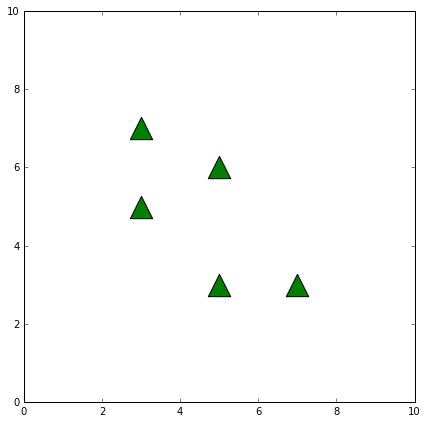

In [10]:
button2 = widgets.Button(description = 'Check')
display(button2)
button2.on_click(on_button_clicked2)